In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Octavo Semestre/Bloque PETER BENJI/tomatos"
!ls

Mounted at /content/drive
/content/drive/MyDrive/Octavo Semestre/Bloque PETER BENJI/tomatos
Tomato	tomatoe.keras  Tomato_Test


In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import numpy as np
import matplotlib.pyplot as plt
#to test an image, you must have a the  model already trained and stored in a file

model = models.load_model("tomatoe.keras")  #model to be loaded

In [22]:
#
test_img = '/Ripe/healthy (598).jpg'
#test_img = '/Reject/reject (611).jpg'
#test_img = '/Unripe/unripe (608).jpg'

img_path = 'Tomato_Test'+ test_img   #image to be tested

#image preprocessing to be used
img = image.load_img(img_path,  target_size=(224,224))
img_tensor = image.img_to_array(img)
print(img_tensor.shape)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

(224, 224, 3)


1/1 [==============================] - 0s 82ms/step
[[9.4715297e-02 9.0525025e-01 3.4564233e-05]]
[[0 1 0]]
class  0 confindence
Ripe


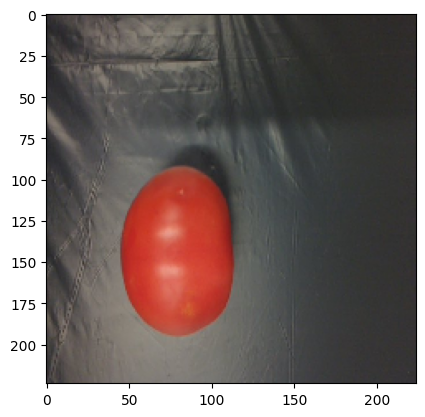

In [23]:
confidence = model.predict(img_tensor)
predict_class = (confidence > 0.5).astype("int32")
print (confidence)
print(predict_class)
print ("class ", predict_class[0][0], "confindence", )

if predict_class[0][1] == 1:
  print("Ripe")
elif predict_class[0][0] == 1:
  print("Reject")
else:
  print("Unripe")

plt.imshow(img_tensor[0])
plt.show()

1/1 [==============================] - 0s 87ms/step


<Figure size 640x480 with 0 Axes>

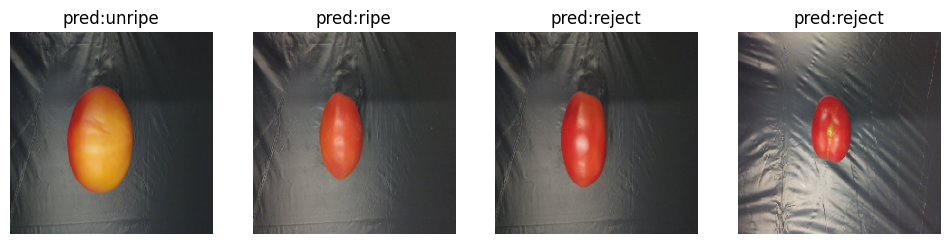

In [27]:
images = ['/Unripe/unripe (56).jpg','/Ripe/healthy (4).jpg','/Ripe/healthy (149).jpg','/Reject/reject (722).jpg']
labels = ["reject", "ripe", "unripe"]
size = len(images)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, size, figsize=(size*3, 4))

i = 0

for test_img in images:
  L_index = 0
  img_path = 'Tomato_Test'+ test_img
  img = image.load_img(img_path,  target_size=(224,224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor)
  predict_class = (confidence > 0.5).astype("int32")

  if predict_class[0][1] == 1:
    L_index = 1
  elif predict_class[0][0] == 1:
    L_index = 0
  else:
    L_index = 2

  axarr[i].set_title("pred:" + labels[L_index])
  axarr[i].imshow(img)
  axarr[i].axis("off")
  i = i + 1

<Figure size 640x480 with 0 Axes>

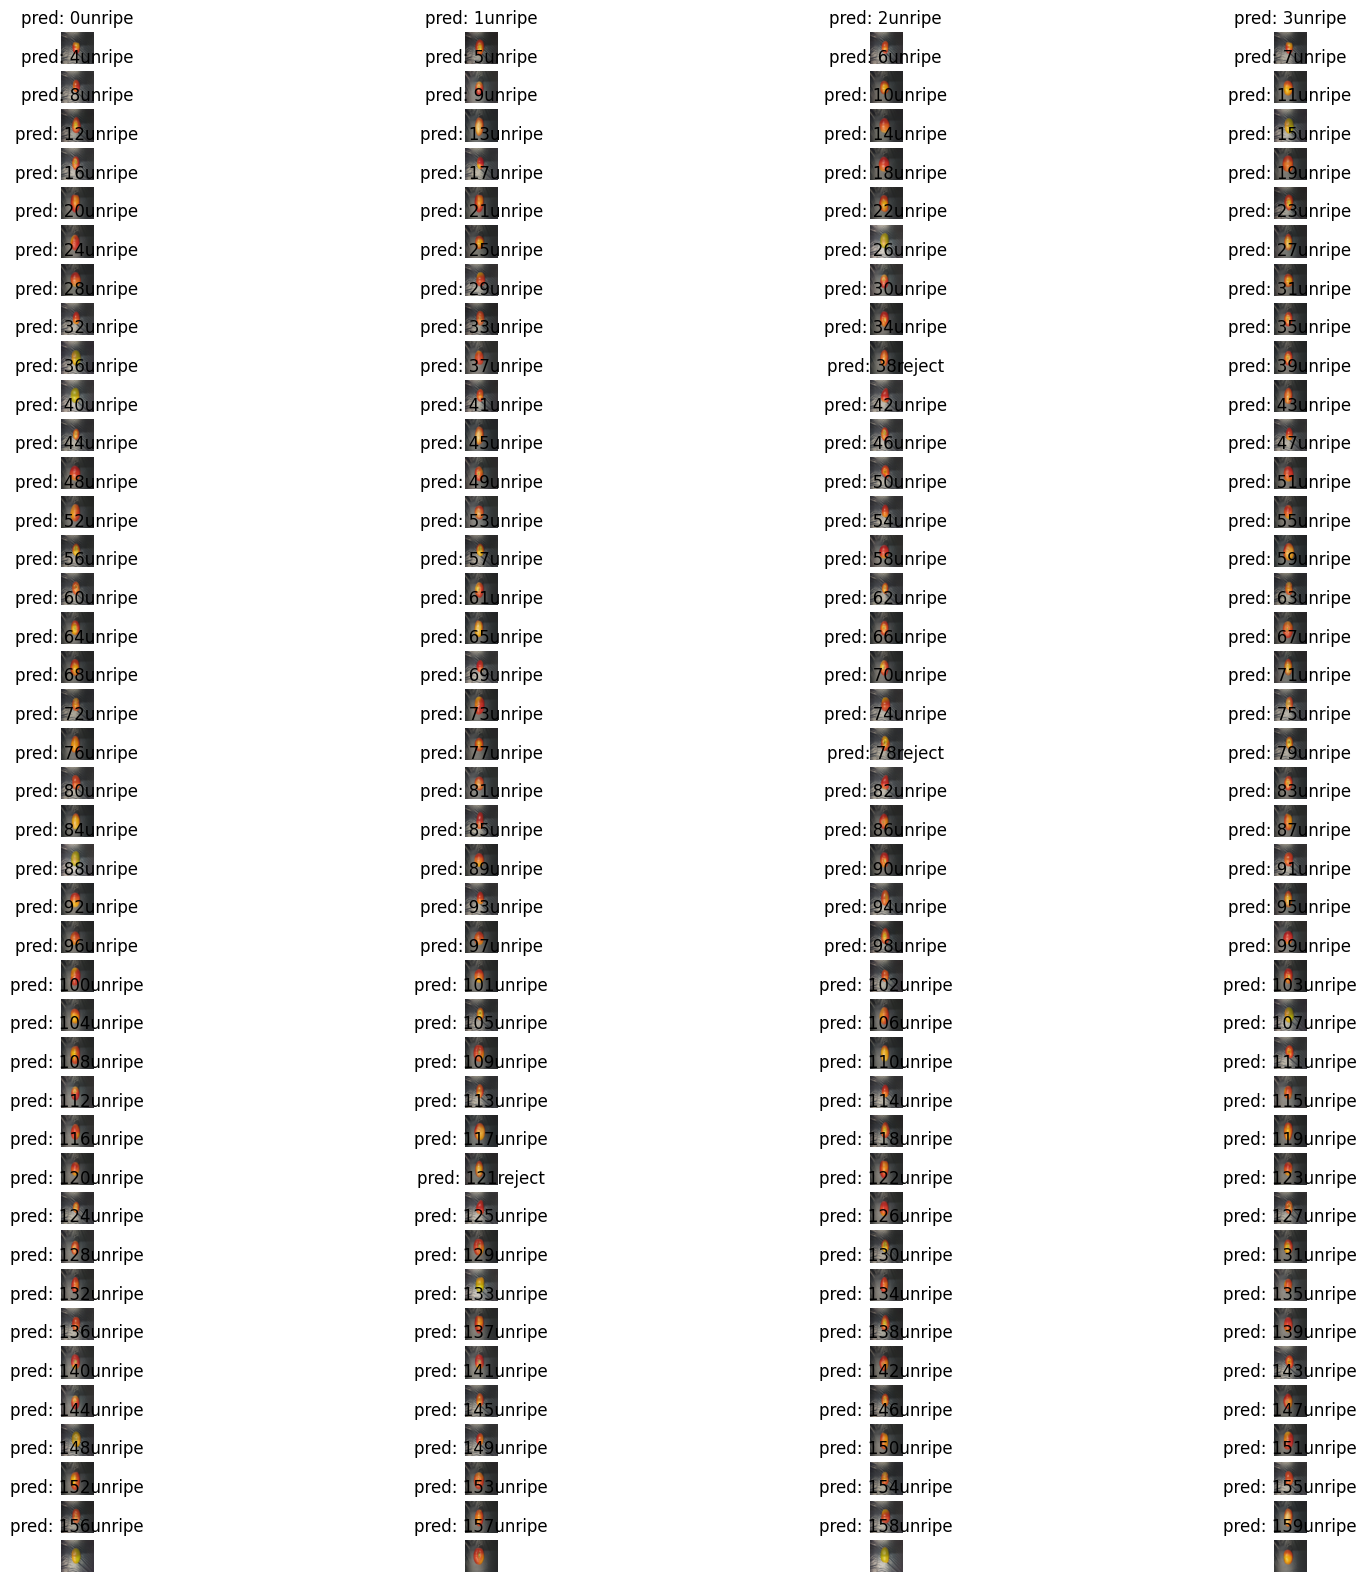

In [44]:
from os import walk

labels = ["reject", "ripe", "unripe"]

files = next(walk('Tomato_Test/Unripe'), (None, None, []))[2]
size = len(files)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots((size//4), 4, figsize=(20, 20))

i = 0

for test_img in files:
  L_index = 0
  img_path = 'Tomato_Test/Unripe/' + test_img
  img = image.load_img(img_path,  target_size=(224,224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor, verbose = 0)
  predict_class = (confidence > 0.5).astype("int32")

  if predict_class[0][1] == 1:
    L_index = 1
  elif predict_class[0][0] == 1:
    L_index = 0
  else:
    L_index = 2

  axarr[i//4,i%4].set_title("pred: "+ str(i) + labels[L_index])
  axarr[i//4,i%4].axis("off")
  axarr[i//4,i%4].imshow(img)

  i = i + 1


<Figure size 640x480 with 0 Axes>

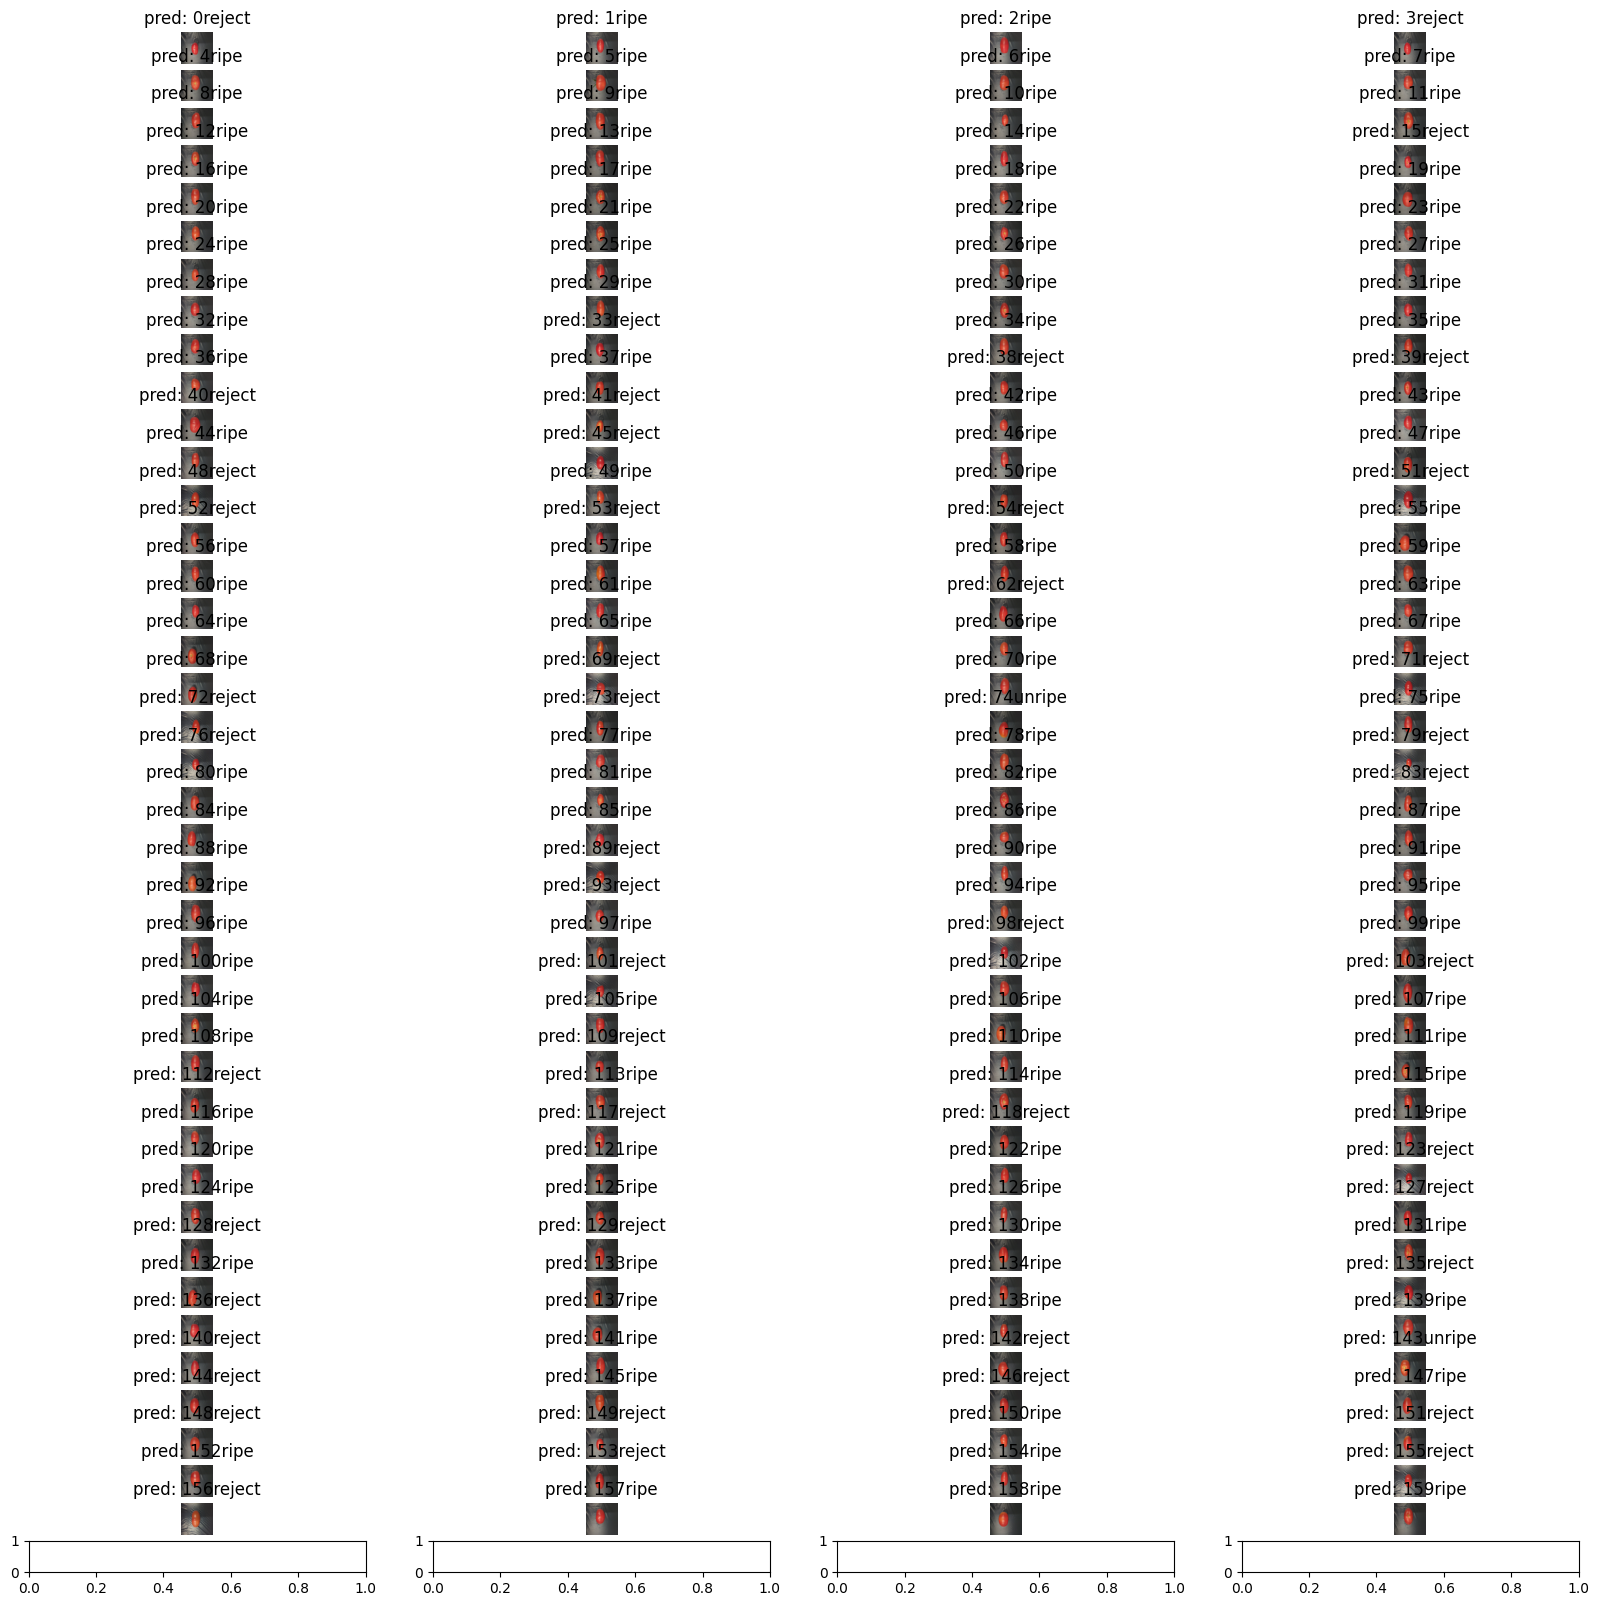

In [41]:
labels = ["reject", "ripe", "unripe"]

files = next(walk('Tomato_Test/Ripe'), (None, None, []))[2]
size = len(files)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots((size//4), 4, figsize=(20, 20))

i = 0

for test_img in files:
  L_index = 0
  img_path = 'Tomato_Test/Ripe/' + test_img
  img = image.load_img(img_path,  target_size=(224,224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor, verbose = 0)
  predict_class = (confidence > 0.5).astype("int32")

  if predict_class[0][1] == 1:
    L_index = 1
  elif predict_class[0][0] == 1:
    L_index = 0
  else:
    L_index = 2

  axarr[i//4,i%4].set_title("pred: "+ str(i) + labels[L_index])
  axarr[i//4,i%4].axis("off")
  axarr[i//4,i%4].imshow(img)

  i = i + 1

<Figure size 640x480 with 0 Axes>

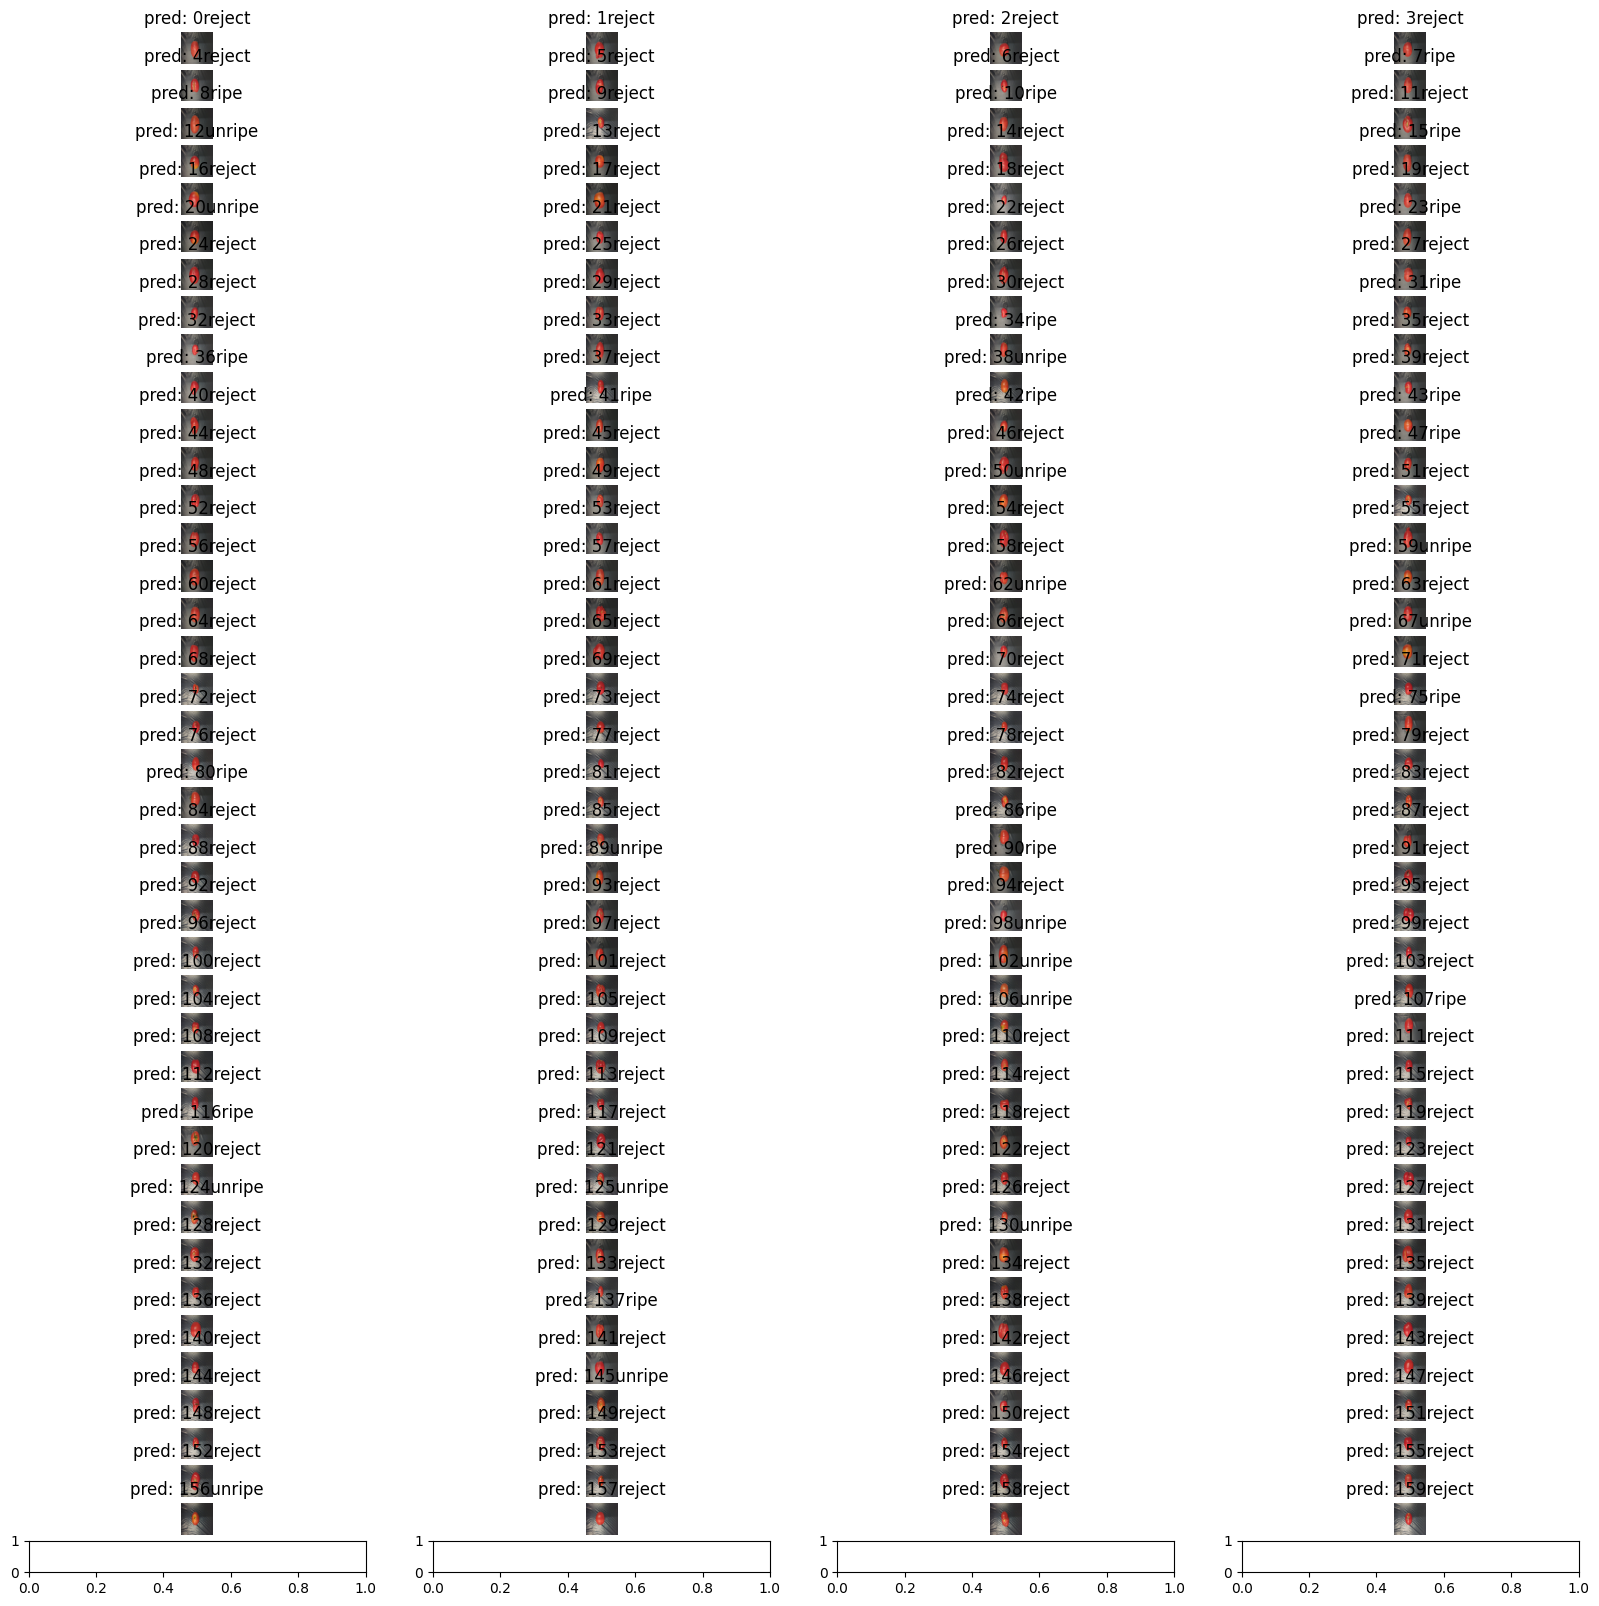

In [40]:
labels = ["reject", "ripe", "unripe"]

files = next(walk('Tomato_Test/Reject'), (None, None, []))[2]
size = len(files)

plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots((size//4), 4, figsize=(20, 20))

i = 0

for test_img in files:
  L_index = 0
  img_path = 'Tomato_Test/Reject/' + test_img
  img = image.load_img(img_path,  target_size=(224,224))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor /= 255.
  confidence = model.predict(img_tensor, verbose = 0)
  predict_class = (confidence > 0.5).astype("int32")

  if predict_class[0][1] == 1:
    L_index = 1
  elif predict_class[0][0] == 1:
    L_index = 0
  else:
    L_index = 2

  axarr[i//4,i%4].set_title("pred: "+ str(i) + labels[L_index])
  axarr[i//4,i%4].axis("off")
  axarr[i//4,i%4].imshow(img)

  i = i + 1